<a href="https://colab.research.google.com/github/rafaelmt35/neuralnetwork2023/blob/main/lab2_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Импорт**

In [210]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [211]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Neural Network/lab2/kaliningrad_weather.csv",sep=';', encoding='iso-8859-1')
data.head()

,LocalTime,T,Po,P,Pa,U,DD
0,19.10.2020 11:00,8.0,761.2,762.5,NaN,83.0,Âåòåð
1,19.10.2020 08:00,5.3,760.0,761.3,NaN,90.0,Âåòåð
2,19.10.2020 05:00,3.1,759.2,760.6,NaN,94.0,Âåòåð
3,19.10.2020 02:00,2.9,758.2,759.6,NaN,90.0,Âåòåð
4,18.10.2020 23:00,3.0,757.2,758.5,NaN,91.0,Âåòåð


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LocalTime  26269 non-null  object 
 1   T          26253 non-null  float64
 2   Po         26237 non-null  float64
 3   P          26221 non-null  float64
 4   Pa         21831 non-null  float64
 5   U          26233 non-null  float64
 6   DD         25864 non-null  object 
dtypes: float64(5), object(2)
memory usage: 1.4+ MB


In [213]:
data = data[['LocalTime','T']]

In [214]:
data.isna().sum()

LocalTime     0
T            16
dtype: int64

In [215]:
data = data.dropna()

In [216]:
data.isna().sum()

LocalTime    0
T            0
dtype: int64

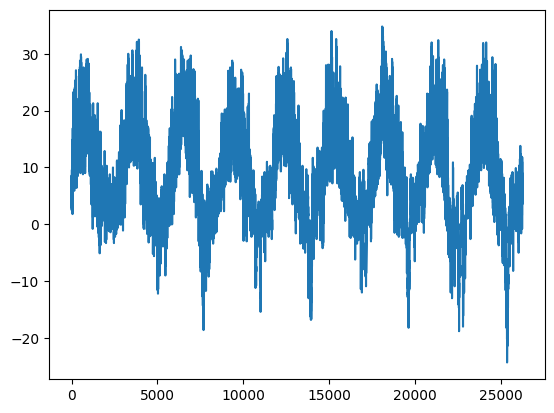

In [217]:
plt.plot(range(1,len(data['T'].values)+1),data['T'].values)

In [218]:
# Extract and normalize the target column
min_max_scaler = MinMaxScaler()
data = data['T'].values
data = min_max_scaler.fit_transform(data.reshape(-1, 1))

In [219]:
print(data.shape)

(26253, 1)


In [220]:
# Flatten the data shape
data = data.flatten()
print(data.shape)

(26253,)


In [221]:
window = 15

# Calculate the number of samples for training, validation, and test sets
n_samples = data.shape[0] - window
n_train_samples = round(0.7 * n_samples)
n_val_samples = round(0.15 * n_samples)
n_test_samples = n_samples - n_train_samples - n_val_samples

print('Train = ',n_train_samples,'Validation = ',n_val_samples,'Test = ',n_test_samples)

Train =  18367 Validation =  3936 Test =  3935


In [222]:
# Function to create input-output pairs for a given set
def create_pairs(start_index, num_samples):
    X = [data[start_index + i : start_index + i + window] for i in range(num_samples)]
    y = [data[start_index + i + window] for i in range(num_samples)]
    return np.array(X), np.array(y)

In [223]:
# Create training, validation, and test sets
X_train, y_train = create_pairs(0, n_train_samples)
X_val, y_val = create_pairs(n_train_samples, n_val_samples)
X_test, y_test = create_pairs(n_train_samples + n_val_samples, n_test_samples)

In [224]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# **Регрессор (RNN)**

In [177]:
# Build the RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [178]:
# Compile the RNN model
rnn_model.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [179]:
# Train the RNN model
rnn_history = rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/10
919/919 [==============================] - 8s 8ms/step - loss: 0.0199 - mae: 0.1072 - val_loss: 0.0063 - val_mae: 0.0621
Epoch 2/10
919/919 [==============================] - 5s 5ms/step - loss: 0.0082 - mae: 0.0688 - val_loss: 0.0043 - val_mae: 0.0485
Epoch 3/10
919/919 [==============================] - 3s 3ms/step - loss: 0.0055 - mae: 0.0551 - val_loss: 0.0036 - val_mae: 0.0419
Epoch 4/10
919/919 [==============================] - 6s 6ms/step - loss: 0.0047 - mae: 0.0508 - val_loss: 0.0029 - val_mae: 0.0402
Epoch 5/10
919/919 [==============================] - 8s 8ms/step - loss: 0.0040 - mae: 0.0471 - val_loss: 0.0022 - val_mae: 0.0356
Epoch 6/10
919/919 [==============================] - 3s 4ms/step - loss: 0.0035 - mae: 0.0446 - val_loss: 0.0020 - val_mae: 0.0338
Epoch 7/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0032 - mae: 0.0425 - val_loss: 0.0018 - val_mae: 0.0323
Epoch 8/10
919/919 [==============================] - 5s 5ms/step - loss: 0.

### **MSE, MAE, & R2**

In [180]:
# Get R2, MSE, & MAE scores
y_pred = rnn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

123/123 [==============================] - 2s 8ms/step
MSE: 0.00
MAE: 0.03
R-squared (R^2): 0.94


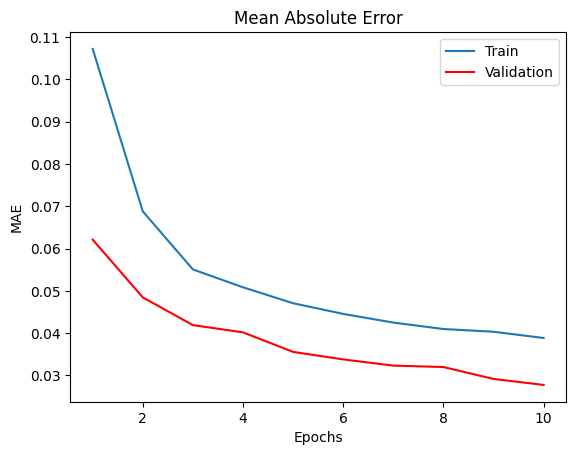

In [184]:
# Visualize the mean absolute error
mae = rnn_history.history['mae']
val_mae = rnn_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### **Predicting**

In [243]:
# Predict using test sets
y_pred = rnn_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

123/123 [==============================] - 1s 4ms/step
MAE =  1.655  degrees
R2-score =  0.939


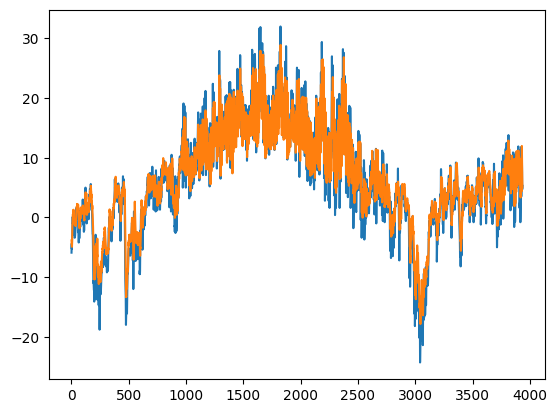

In [183]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

# **Регрессор (ячейку LSTM)**

In [201]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [202]:
# Compile the LSTM model
lstm_model.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [203]:
# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/10
919/919 [==============================] - 7s 4ms/step - loss: 0.0197 - mae: 0.1027 - val_loss: 0.0034 - val_mae: 0.0457
Epoch 2/10
919/919 [==============================] - 4s 4ms/step - loss: 0.0073 - mae: 0.0647 - val_loss: 0.0026 - val_mae: 0.0383
Epoch 3/10
919/919 [==============================] - 5s 5ms/step - loss: 0.0047 - mae: 0.0505 - val_loss: 0.0028 - val_mae: 0.0346
Epoch 4/10
919/919 [==============================] - 7s 8ms/step - loss: 0.0041 - mae: 0.0466 - val_loss: 0.0035 - val_mae: 0.0428
Epoch 5/10
919/919 [==============================] - 5s 6ms/step - loss: 0.0040 - mae: 0.0459 - val_loss: 0.0026 - val_mae: 0.0329
Epoch 6/10
919/919 [==============================] - 8s 9ms/step - loss: 0.0038 - mae: 0.0446 - val_loss: 0.0023 - val_mae: 0.0319
Epoch 7/10
919/919 [==============================] - 6s 7ms/step - loss: 0.0031 - mae: 0.0407 - val_loss: 0.0013 - val_mae: 0.0264
Epoch 8/10
919/919 [==============================] - 4s 4ms/step - loss: 0.

### **MSE, MAE, & R2**

In [204]:
# Get R2, MSE, & MAE scores
y_pred = lstm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

123/123 [==============================] - 2s 8ms/step
MSE: 0.00
MAE: 0.03
R-squared (R^2): 0.93


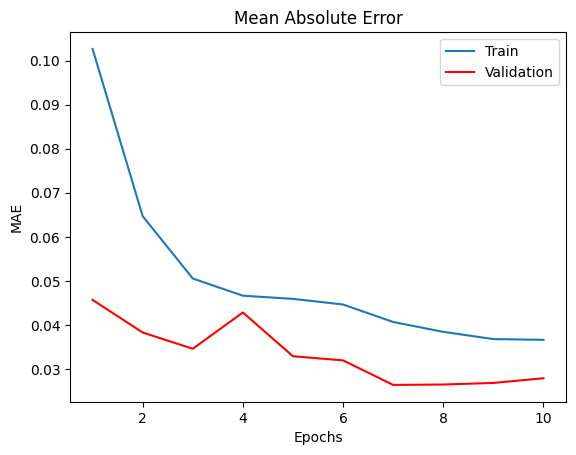

In [205]:
# Visualize the mean absolute error
mae = lstm_history.history['mae']
val_mae = lstm_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### **Predicting**

In [242]:
# Predict using test sets
y_pred = lstm_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

123/123 [==============================] - 1s 6ms/step
MAE =  1.713  degrees
R2-score =  0.928


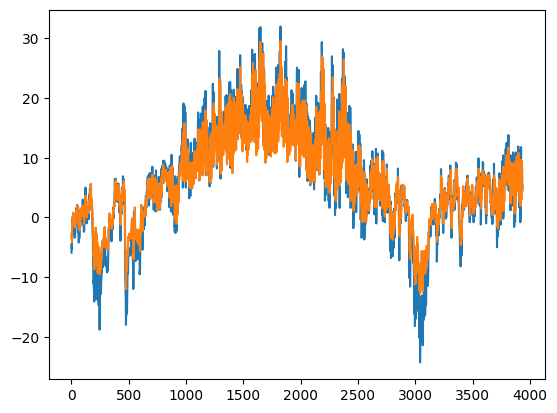

In [208]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

# **Регрессор (стек двух слоёв с LSTM)**

In [234]:
# Build the LSTM model
lstm_model2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True),
    Dropout(0.2),
    tf.keras.layers.LSTM(10, activation='relu'),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [235]:
# Compile the LSTM model
lstm_model2.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [236]:
# Train the LSTM model
lstm_history2 = lstm_model2.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
919/919 [==============================] - 10s 7ms/step - loss: 0.0484 - mae: 0.1574 - val_loss: 0.0057 - val_mae: 0.0591
Epoch 2/20
919/919 [==============================] - 7s 7ms/step - loss: 0.0112 - mae: 0.0807 - val_loss: 0.0033 - val_mae: 0.0427
Epoch 3/20
919/919 [==============================] - 5s 5ms/step - loss: 0.0060 - mae: 0.0581 - val_loss: 0.0027 - val_mae: 0.0394
Epoch 4/20
919/919 [==============================] - 7s 7ms/step - loss: 0.0043 - mae: 0.0490 - val_loss: 0.0019 - val_mae: 0.0322
Epoch 5/20
919/919 [==============================] - 6s 7ms/step - loss: 0.0037 - mae: 0.0451 - val_loss: 0.0017 - val_mae: 0.0319
Epoch 6/20
919/919 [==============================] - 6s 6ms/step - loss: 0.0034 - mae: 0.0434 - val_loss: 0.0018 - val_mae: 0.0323
Epoch 7/20
919/919 [==============================] - 7s 7ms/step - loss: 0.0033 - mae: 0.0430 - val_loss: 0.0015 - val_mae: 0.0300
Epoch 8/20
919/919 [==============================] - 5s 5ms/step - loss: 0

### **MSE, MAE, & R2**

In [237]:
# Get R2, MSE, & MAE scores
y_pred = lstm_model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

123/123 [==============================] - 1s 2ms/step
MSE: 0.00
MAE: 0.03
R-squared (R^2): 0.92


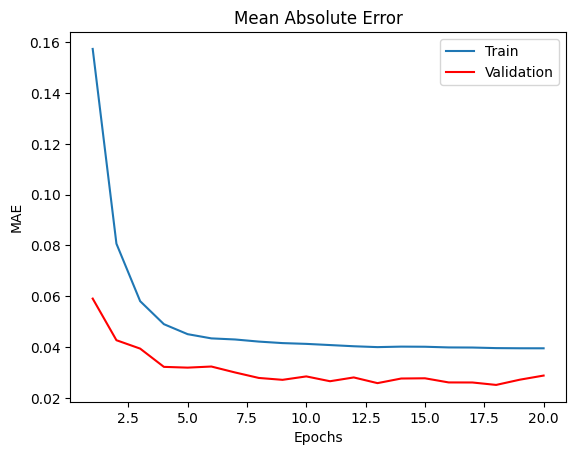

In [238]:
# Visualize the mean absolute error
mae = lstm_history2.history['mae']
val_mae = lstm_history2.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### **Predicting**

In [241]:
# Predict using test sets
y_pred = lstm_model2.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

123/123 [==============================] - 1s 6ms/step
MAE =  1.848  degrees
R2-score =  0.923


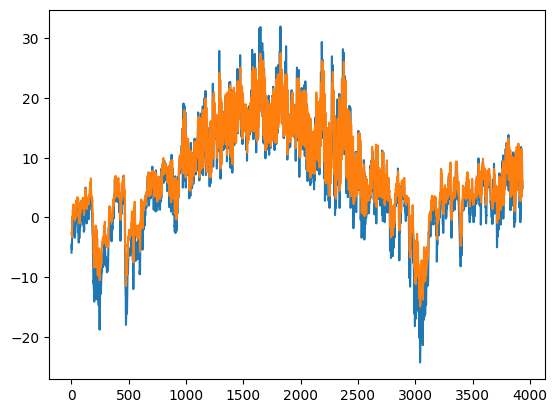

In [240]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)